In [16]:
import requests
from bs4 import BeautifulSoup
import html5lib
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [17]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [18]:
pd.set_option('display.max_rows',None)

In [19]:
!pip install pgeocode
import pgeocode
pgeocode.Nominatim('ca')
geolocator = pgeocode.Nominatim('ca')
postal_codes = df['PostalCode'].tolist()
latitudes = []
longitudes = []
for i, postal_code in enumerate(postal_codes):
    # initialize your variable to None
    #print(f'--Getting Postal Code: {postal_code}')
    g = geolocator.query_postal_code(postal_code)
    
    if not g.empty:
        print(f'Postal Code {postal_code} has been retrieved. {len(postal_codes) - (i + 1)} codes left')
        latitudes.append(g.latitude)
        longitudes.append(g.longitude)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Postal Code M3A has been retrieved. 102 codes left
Postal Code M4A has been retrieved. 101 codes left
Postal Code M5A has been retrieved. 100 codes left
Postal Code M6A has been retrieved. 99 codes left
Postal Code M7A has been retrieved. 98 codes left
Postal Code M9A has been retrieved. 97 codes left
Postal Code M1B has been retrieved. 96 codes left
Postal Code M3B has been retrieved. 95 codes left
Postal Code M4B has been retrieved. 94 codes left
Postal Code M5B has been retrieved. 93 codes left
Postal Code M6B has been retrieved. 92 codes le

In [20]:
df['Latitude'] = latitudes
df['Longitude'] = longitudes


In [21]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Queen's Park,Ontario Provincial Government,43.6641,-79.3889
5,M9A,Etobicoke,Islington Avenue,43.6662,-79.5282
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,M3B,North York,Don Mills North,43.7450,-79.3590
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783


In [30]:
df = df.drop(labels=76,axis=0)

In [37]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Queen's Park,Ontario Provincial Government,43.6641,-79.3889
5,M9A,Etobicoke,Islington Avenue,43.6662,-79.5282
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,M3B,North York,Don Mills North,43.7450,-79.3590
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783
10,M6B,North York,Glencairn,43.7081,-79.4479


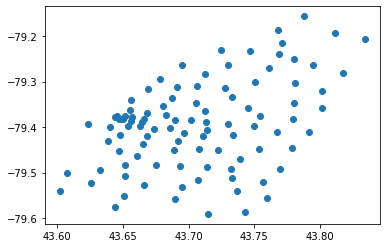

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.scatter(x=df['Latitude'],y=df['Longitude'])

In [34]:
# In order to cluster the neighborhoods I decided to first look at the coordinates of location, then I clustered in 5 different clusters.


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium 

address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)


map_toronto

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [39]:
toronto_df = df

In [42]:
toronto_df = toronto_df.drop('Neighborhood', 1)
toronto_df = toronto_df.drop('Borough', 1)
toronto_df = toronto_df.drop('PostalCode', 1)

In [43]:
toronto_df

,Latitude,Longitude
1,43.7276,-79.3148
2,43.6555,-79.3626
3,43.7223,-79.4504
4,43.6641,-79.3889
5,43.6662,-79.5282
6,43.8113,-79.1930
7,43.7450,-79.3590
8,43.7063,-79.3094
9,43.6572,-79.3783
10,43.7081,-79.4479


In [44]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [45]:
df

,Cluster Labels,PostalCode,Borough,Neighborhood,Latitude,Longitude
1,1,M4A,North York,Victoria Village,43.7276,-79.3148
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,4,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,2,M7A,Queen's Park,Ontario Provincial Government,43.6641,-79.3889
5,0,M9A,Etobicoke,Islington Avenue,43.6662,-79.5282
6,3,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,1,M3B,North York,Don Mills North,43.7450,-79.3590
8,1,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783
10,4,M6B,North York,Glencairn,43.7081,-79.4479


In [48]:
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters